## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(42)
np.random.seed(42)

## Collecting the data

In [3]:
tools = [
    "ChatGPT","Claude","Perplexity","Midjourney","Stable Diffusion","DALL·E",
    "Adobe Firefly","Runway","ElevenLabs","Synthesia","Descript","Pika Labs",
    "Hugging Face","Weights & Biases","LangChain","LlamaIndex","Pinecone",
    "OpenAI API","Anthropic API","Cohere","Tabnine","Replit Ghostwriter",
    "GitHub Copilot","Cursor","DeepCode","Notion AI","Zoom AI","Otter.ai",
    "Grammarly","Microsoft Copilot","Salesforce Einstein","ServiceNow AI",
    "SAP Joule","Oracle AI","IBM Watson","AWS Bedrock","Azure AI Studio",
    "Google Vertex AI","DataRobot","H2O.ai","AutoGPT","BabyAGI",
    "PromptPerfect","PromptLayer","Flowise","AI Dungeon","Character AI",
    "LogoAI","ResumeGPT","AI Resume Writer","OneClick Avatar",
    "Voice AI Pro","AI NFT Generator","Generic Chatbot Pro",
    "Meeting Summary AI","Marketing Copy AI","SEO Content AI",
    "Fraud Detection AI","HR Screening AI","Legal Contract AI",
    "Medical Diagnosis AI","Supply Chain AI","Pricing Optimization AI",
    "Customer Support AI","Email Automation AI","Sales Forecast AI",
    "Recommendation Engine AI","Document Search AI","Video Subtitle AI",
    "Speech-to-Text AI","Image Upscaler AI","Face Swap AI","Music Generator AI"
]

In [4]:
def random_category():
    return random.choice([
        "consumer_ai","creative_ai","developer_ai",
        "enterprise_ai","productivity_ai","ml_platform"
    ])

def pricing_model():
    return random.choice([
        "free","freemium","subscription","usage_based","enterprise"
    ])

def access_method():
    return random.choice([
        "web_app","api","desktop_app","ide_plugin","cli"
    ])

def bool_prob(p):
    return np.random.rand() < p

In [5]:
records = []

current_year = 2025

for i, tool in enumerate(tools, start=1):
    launch_year = random.randint(2015, 2024)
    age = current_year - launch_year

    usability = np.clip(np.random.normal(6.5, 1.5), 1, 10)
    marketing = np.clip(np.random.normal(5.5, 2), 1, 10)
    ecosystem = np.clip(np.random.normal(6, 2), 1, 10)

    retention = np.clip(
        0.2 + (usability + ecosystem) / 25 - marketing / 40 + np.random.normal(0,0.05),
        0.05, 0.95
    )

    success = int(retention > 0.55 and age >= 2)

    records.append({
        "tool_id": i,
        "tool_name": tool,
        "category": random_category(),
        "launch_year": launch_year,
        "age_years": age,
        "pricing_model": pricing_model(),
        "access_method": access_method(),
        "open_source": bool_prob(0.35),
        "github_stars": int(np.random.exponential(15000)) if bool_prob(0.4) else 0,
        "google_trends_score": int(np.clip(np.random.normal(50, 20), 5, 100)),
        "monthly_web_visits_k": int(np.random.exponential(40000)),
        "api_available": bool_prob(0.55),
        "integration_count": int(np.clip(np.random.normal(6, 4), 0, 25)),
        "user_friendliness_score": round(usability,1),
        "marketing_effort_score": round(marketing,1),
        "ecosystem_score": round(ecosystem,1),
        "retention_proxy": round(retention,2),
        "enterprise_features": bool_prob(0.4),
        "success_label": success
    })


In [6]:
df_master = pd.DataFrame(records)

In [7]:
df_master.to_csv("ai_products_master.csv", index=False)

In [8]:
ts_records = []

for _, row in df_master.iterrows():
    base = row["monthly_web_visits_k"]
    retention = row["retention_proxy"]

    for year in range(2022, 2025):
        for q in ["Q1","Q2","Q3","Q4"]:
            growth = (1 + retention) ** ((year-2022) + ["Q1","Q2","Q3","Q4"].index(q)/4)
            noise = np.random.normal(0.9, 0.15)

            ts_records.append({
                "tool_name": row["tool_name"],
                "year": year,
                "quarter": q,
                "web_visits_k": int(base * growth * noise),
                "google_trends_score": int(
                    np.clip(row["google_trends_score"] * growth / 2, 5, 100)
                ),
                "retention_proxy": retention
            })

df_ts = pd.DataFrame(ts_records)
df_ts.to_csv("ai_products_timeseries.csv", index=False)

In [9]:
df_metrics = df_master[
    [
        "user_friendliness_score",
        "ecosystem_score",
        "integration_count",
        "api_available",
        "pricing_model",
        "marketing_effort_score",
        "enterprise_features",
        "retention_proxy",
        "success_label"
    ]
]

df_metrics.to_csv("ai_success_metrics_only.csv", index=False)

## Data Sanity Check

In [10]:
df_master.shape

(73, 19)

In [11]:
df_ts.shape

(876, 6)

In [12]:
df_metrics.shape

(73, 9)

In [13]:
df_master.head()

,tool_id,tool_name,category,launch_year,age_years,pricing_model,access_method,open_source,github_stars,google_trends_score,monthly_web_visits_k,api_available,integration_count,user_friendliness_score,marketing_effort_score,ecosystem_score,retention_proxy,enterprise_features,success_label
0,1,ChatGPT,consumer_ai,2016,9,subscription,api,True,897,55,49250,True,10,7.2,5.2,7.3,0.73,False,1
1,2,Claude,creative_ai,2018,7,free,cli,True,0,15,37854,True,3,5.8,6.6,5.1,0.45,True,0
2,3,Perplexity,productivity_ai,2016,9,usage_based,web_app,False,0,52,7478,True,3,5.4,1.2,4.7,0.61,False,1
3,4,Midjourney,consumer_ai,2015,10,freemium,api,True,0,66,14941,True,1,5.6,4.9,4.8,0.59,False,1
4,5,Stable Diffusion,productivity_ai,2023,2,free,cli,True,0,23,31296,True,2,6.8,7.3,4.0,0.37,False,0


In [25]:
df_metrics.head()

,user_friendliness_score,ecosystem_score,integration_count,api_available,pricing_model,marketing_effort_score,enterprise_features,retention_proxy,success_label
0,7.2,7.3,10,True,subscription,5.2,False,0.73,1
1,5.8,5.1,3,True,free,6.6,True,0.45,0
2,5.4,4.7,3,True,usage_based,1.2,False,0.61,1
3,5.6,4.8,1,True,freemium,4.9,False,0.59,1
4,6.8,4.0,2,True,free,7.3,False,0.37,0


In [15]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tool_id                  73 non-null     int64  
 1   tool_name                73 non-null     object 
 2   category                 73 non-null     object 
 3   launch_year              73 non-null     int64  
 4   age_years                73 non-null     int64  
 5   pricing_model            73 non-null     object 
 6   access_method            73 non-null     object 
 7   open_source              73 non-null     bool   
 8   github_stars             73 non-null     int64  
 9   google_trends_score      73 non-null     int64  
 10  monthly_web_visits_k     73 non-null     int64  
 11  api_available            73 non-null     bool   
 12  integration_count        73 non-null     int64  
 13  user_friendliness_score  73 non-null     float64
 14  marketing_effort_score   73 

In [17]:
col = df_master.columns
for i in col:
    print(i, df_master[i].unique())

tool_id [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73]
tool_name ['ChatGPT' 'Claude' 'Perplexity' 'Midjourney' 'Stable Diffusion' 'DALL·E'
 'Adobe Firefly' 'Runway' 'ElevenLabs' 'Synthesia' 'Descript' 'Pika Labs'
 'Hugging Face' 'Weights & Biases' 'LangChain' 'LlamaIndex' 'Pinecone'
 'OpenAI API' 'Anthropic API' 'Cohere' 'Tabnine' 'Replit Ghostwriter'
 'GitHub Copilot' 'Cursor' 'DeepCode' 'Notion AI' 'Zoom AI' 'Otter.ai'
 'Grammarly' 'Microsoft Copilot' 'Salesforce Einstein' 'ServiceNow AI'
 'SAP Joule' 'Oracle AI' 'IBM Watson' 'AWS Bedrock' 'Azure AI Studio'
 'Google Vertex AI' 'DataRobot' 'H2O.ai' 'AutoGPT' 'BabyAGI'
 'PromptPerfect' 'PromptLayer' 'Flowise' 'AI Dungeon' 'Character AI'
 'LogoAI' 'ResumeGPT' 'AI Resume Writer' 'OneClick Avatar' 'Voice AI Pro'
 'AI NFT Generator' 'Generic Chatbot Pro' 'Meeting Su

## Data Analysis

## Univariate Analysis

In [40]:
df_success = pd.DataFrame(df_master['success_label'].value_counts())
df_success['%'] = df_master['success_label'].value_counts(normalize=True)*100
df_success

,count,%
success_label,,
1,38,52.054795
0,35,47.945205


### Data is evenly distributed
### or we can say we have a balanced dataset

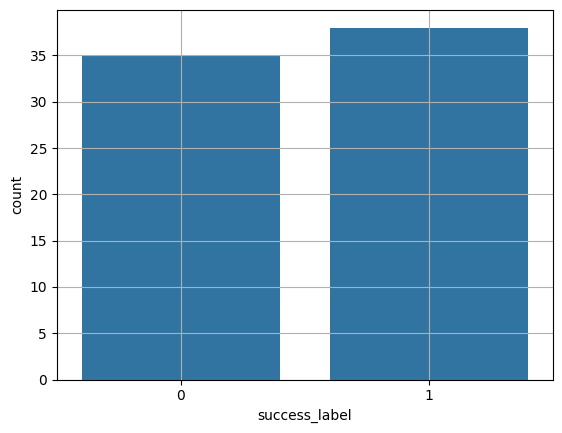

In [41]:
sns.countplot(x=df_master['success_label'])
plt.grid()
plt.show()

In [42]:
df_master['enterprise_features'].value_counts()

enterprise_features
False    39
True     34
Name: count, dtype: int64

In [47]:
df_master['category'].value_counts()

category
creative_ai        16
enterprise_ai      14
consumer_ai        13
productivity_ai    13
ml_platform        11
developer_ai        6
Name: count, dtype: int64

In [55]:
df_master['launch_year'].value_counts().sort_index()

launch_year
2015     9
2016     9
2017     3
2018    14
2019     7
2020     7
2021     5
2022     6
2023     8
2024     5
Name: count, dtype: int64

## Bivariate Analysis

In [56]:
df_master.groupby('enterprise_features')['success_label'].value_counts()

enterprise_features  success_label
False                0                20
                     1                19
True                 1                19
                     0                15
Name: count, dtype: int64

In [96]:
cat = pd.DataFrame(df_master.groupby('category')['success_label'].value_counts())
cat['%'] = df_master.groupby('category')['success_label'].value_counts(normalize=True)*100
cat

count          %
category        success_label                  
consumer_ai     1                  8  61.538462
                0                  5  38.461538
creative_ai     0                  9  56.250000
                1                  7  43.750000
developer_ai    0                  3  50.000000
                1                  3  50.000000
enterprise_ai   1                  8  57.142857
                0                  6  42.857143
ml_platform     1                  7  63.636364
                0                  4  36.363636
productivity_ai 0                  8  61.538462
                1                  5  38.461538

#### "ml_platform" and "consumer_ai" have better success rate
#### "Productivity_ai" has the least success rate or more failure rate

In [97]:
ly = pd.DataFrame(df_master.groupby('launch_year')['success_label'].value_counts())
ly['%'] = df_master.groupby('launch_year')['success_label'].value_counts(normalize=True)*100
ly

count           %
launch_year success_label                   
2015        1                  6   66.666667
            0                  3   33.333333
2016        1                  5   55.555556
            0                  4   44.444444
2017        1                  2   66.666667
            0                  1   33.333333
2018        0                  7   50.000000
            1                  7   50.000000
2019        1                  5   71.428571
            0                  2   28.571429
2020        1                  6   85.714286
            0                  1   14.285714
2021        0                  4   80.000000
            1                  1   20.000000
2022        1                  4   66.666667
            0                  2   33.333333
2023        0                  6   75.000000
            1                  2   25.000000
2024        0                  5  100.000000

In [98]:
ag = pd.DataFrame(df_master.groupby('age_years')['success_label'].value_counts())
ag['%'] = df_master.groupby('age_years')['success_label'].value_counts(normalize=True)*100
ag

count           %
age_years success_label                   
1         0                  5  100.000000
2         0                  6   75.000000
          1                  2   25.000000
3         1                  4   66.666667
          0                  2   33.333333
4         0                  4   80.000000
          1                  1   20.000000
5         1                  6   85.714286
          0                  1   14.285714
6         1                  5   71.428571
          0                  2   28.571429
7         0                  7   50.000000
          1                  7   50.000000
8         1                  2   66.666667
          0                  1   33.333333
9         1                  5   55.555556
          0                  4   44.444444
10        1                  6   66.666667
          0                  3   33.333333

## There's a 100% chance that a new AI product will be a success -- is it because of the hype

In [99]:
pm = pd.DataFrame(df_master.groupby('pricing_model')['success_label'].value_counts())
pm['%'] = df_master.groupby('pricing_model')['success_label'].value_counts(normalize=True)*100
pm

count          %
pricing_model success_label                  
enterprise    1                  8  80.000000
              0                  2  20.000000
free          0                 11  78.571429
              1                  3  21.428571
freemium      0                 10  55.555556
              1                  8  44.444444
subscription  1                 11  64.705882
              0                  6  35.294118
usage_based   1                  8  57.142857
              0                  6  42.857143

### 80% chance of success rate if the pricing model is 'Enterprise'
### 78% chance of failure rate if the pricing model is 'free'

In [101]:
am = pd.DataFrame(df_master.groupby('access_method')['success_label'].value_counts())
am['%'] = df_master.groupby('access_method')['success_label'].value_counts(normalize=True)*100
am

count          %
access_method success_label                  
api           1                  8  61.538462
              0                  5  38.461538
cli           0                 13  76.470588
              1                  4  23.529412
desktop_app   1                  7  70.000000
              0                  3  30.000000
ide_plugin    1                 10  71.428571
              0                  4  28.571429
web_app       0                 10  52.631579
              1                  9  47.368421

### 76% chance of failure rate if the access method is 'cli'

In [110]:
os = pd.DataFrame(df_master.groupby('open_source')['success_label'].value_counts())
os['%'] = df_master.groupby('open_source')['success_label'].value_counts(normalize=True).sort_values()*100
os

count          %
open_source success_label                  
False       1                 24  53.333333
            0                 21  46.666667
True        0                 14  50.000000
            1                 14  50.000000

In [112]:
am = pd.DataFrame(df_master.groupby('api_available')['success_label'].value_counts())
am['%'] = df_master.groupby('api_available')['success_label'].value_counts(normalize=True)*100
am

count          %
api_available success_label                  
False         0                 18  56.250000
              1                 14  43.750000
True          1                 24  58.536585
              0                 17  41.463415

In [113]:
ef = pd.DataFrame(df_master.groupby('enterprise_features')['success_label'].value_counts())
ef['%'] = df_master.groupby('enterprise_features')['success_label'].value_counts(normalize=True)*100
ef

count          %
enterprise_features success_label                  
False               0                 20  51.282051
                    1                 19  48.717949
True                1                 19  55.882353
                    0                 15  44.117647

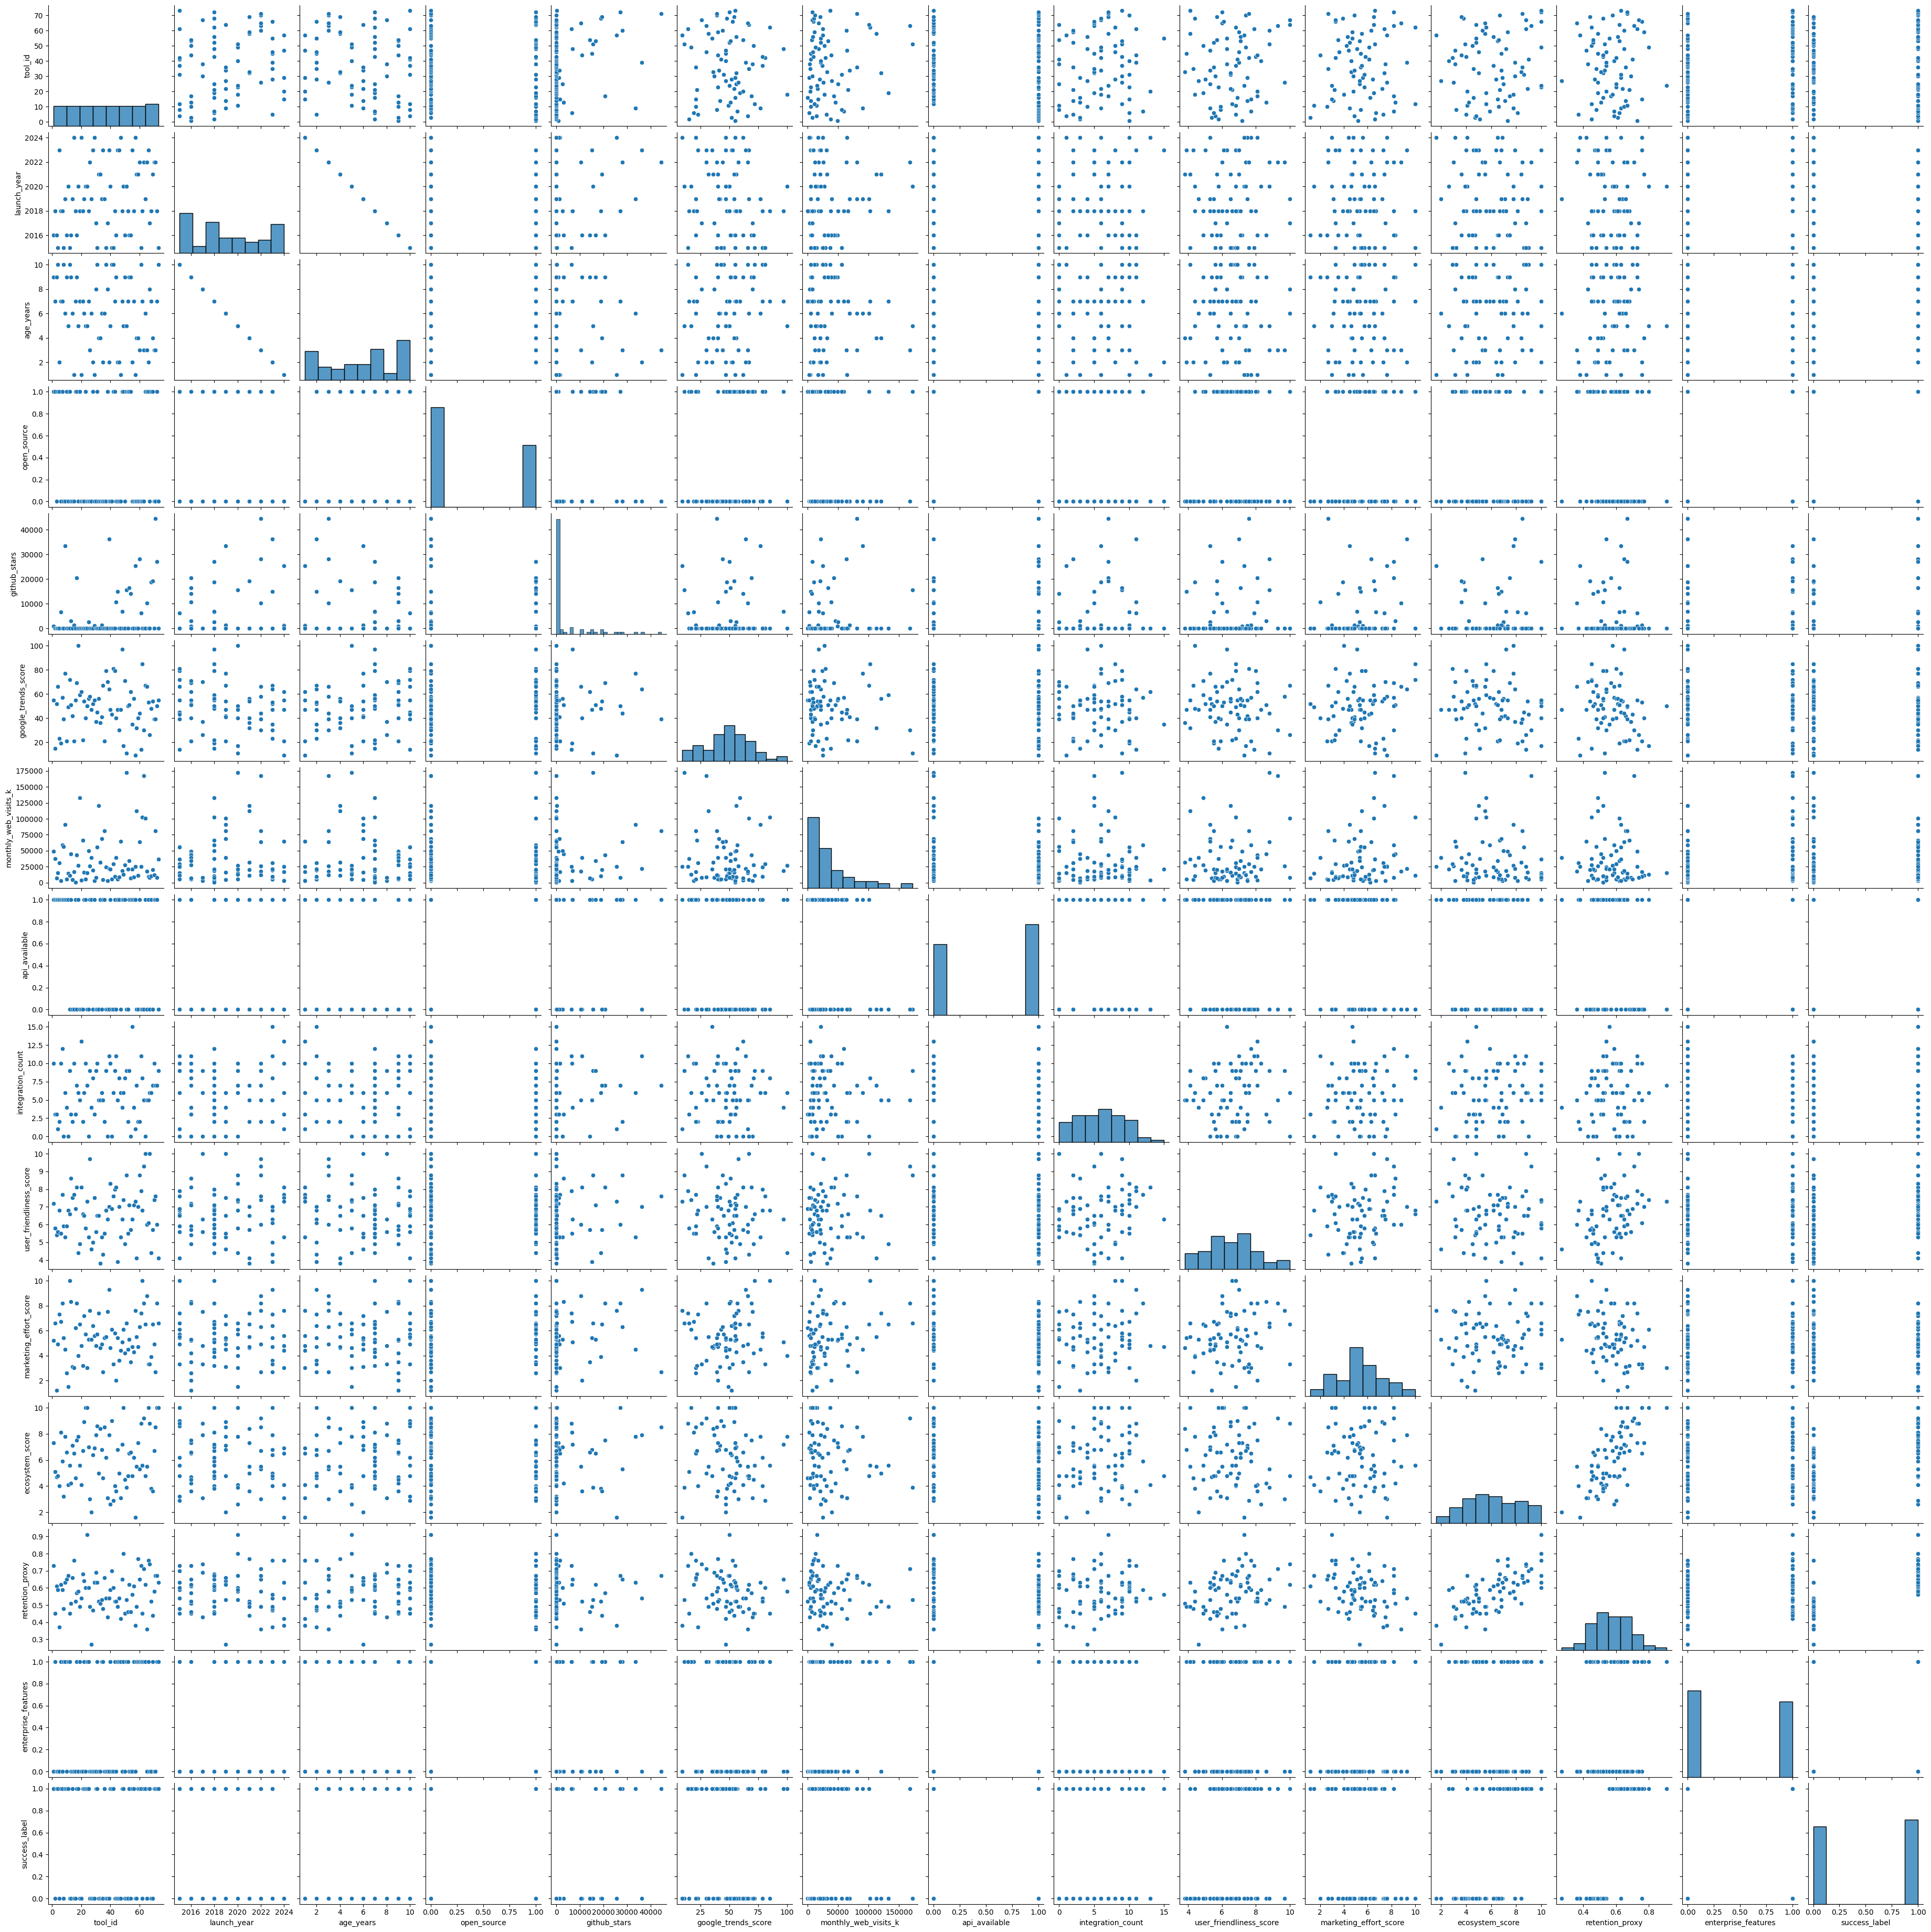

In [154]:
sns.pairplot(df_master)

## Heatmap for numerical features

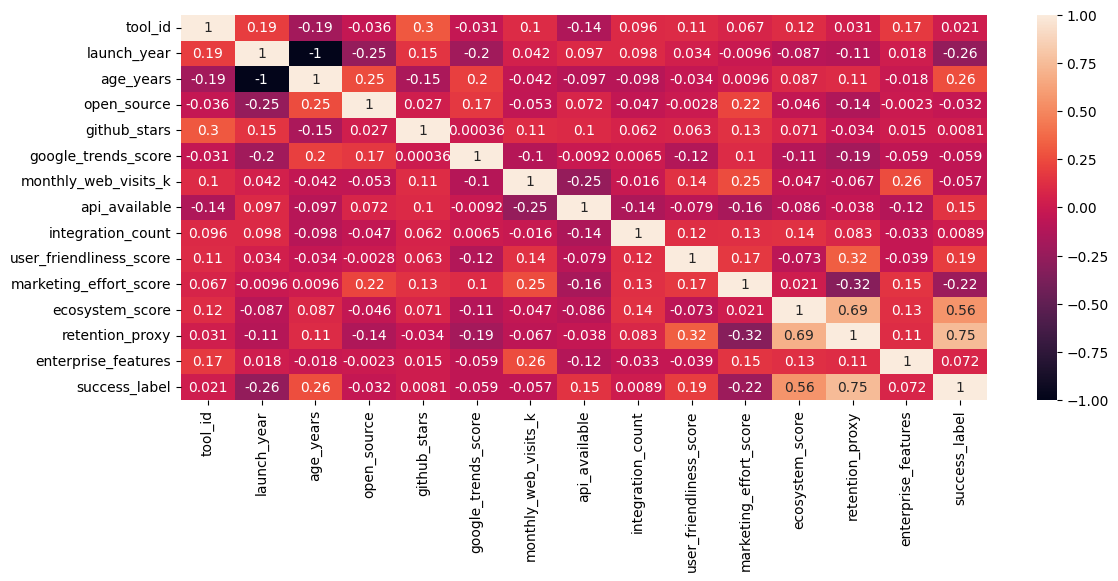

In [161]:
plt.figure(figsize=(13,5))
sns.heatmap(df_master.corr(numeric_only=True), annot=True)
plt.show()

## if the Ecosystem_score is high then the retention_proxy is high
## if the retention_proxy is high then the success rate is high

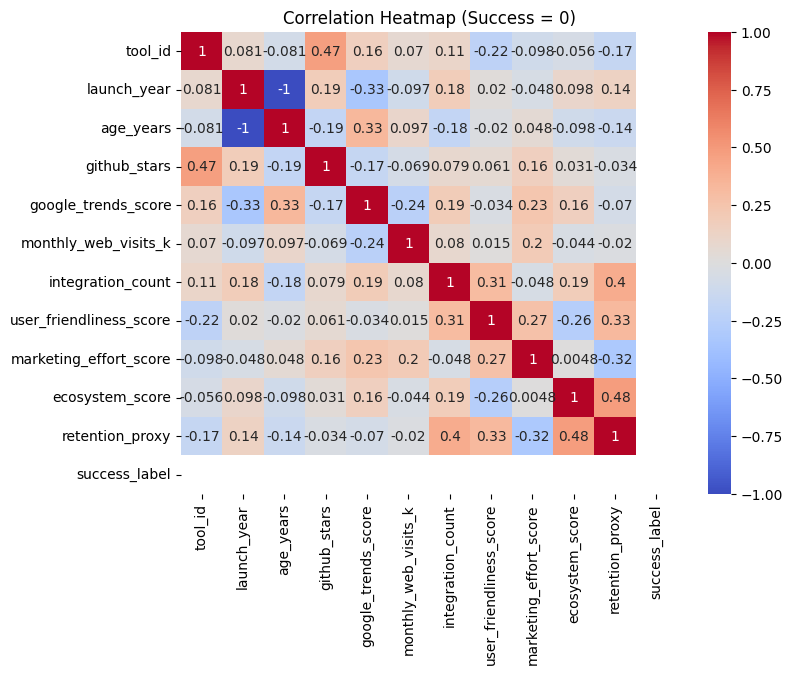

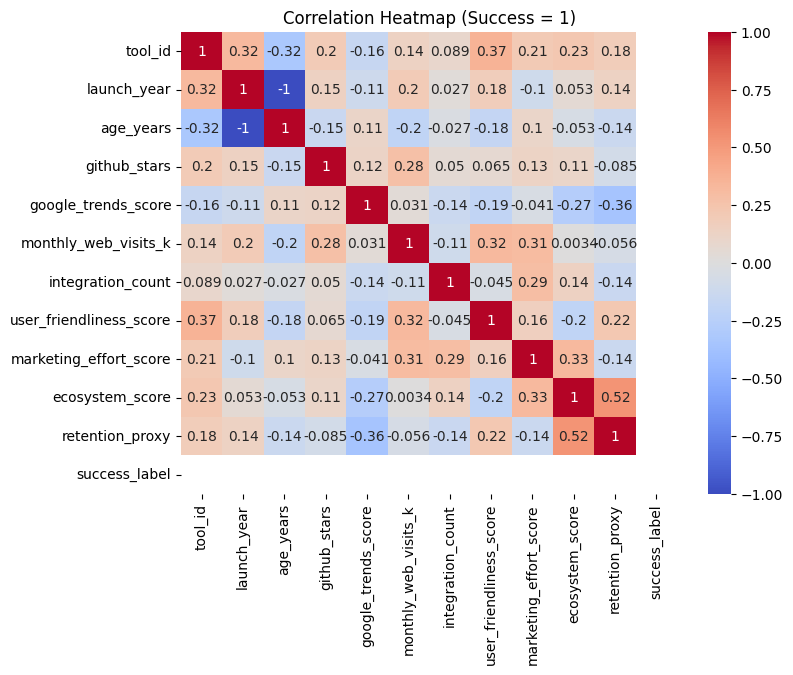

In [165]:
for label in [0, 1]:
    corr = (
        df_master[df_master['success_label'] == label]
        .select_dtypes(include='number')
        .corr()
    )

    plt.figure(figsize=(8,6))
    sns.heatmap(corr, cmap='coolwarm', center=0, annot=True)
    plt.title(f'Correlation Heatmap (Success = {label})')
    plt.show()

<Axes: xlabel='success_label', ylabel='github_stars'>

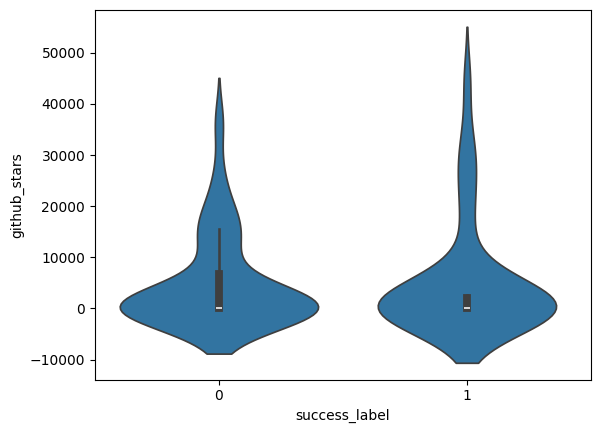

In [123]:
sns.violinplot(x='success_label', y='github_stars', data=df_master)

<Axes: xlabel='success_label', ylabel='github_stars'>

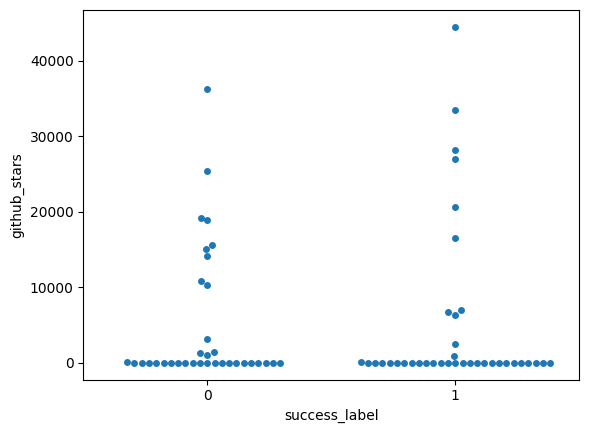

In [127]:
sns.swarmplot(
    x='success_label',
    y='github_stars',
    data=df_master)

In [130]:
df_master['github_stars'].describe().reset_index().transpose()

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
github_stars,73.0,5022.821918,10008.194489,0.0,0.0,0.0,3096.0,44479.0


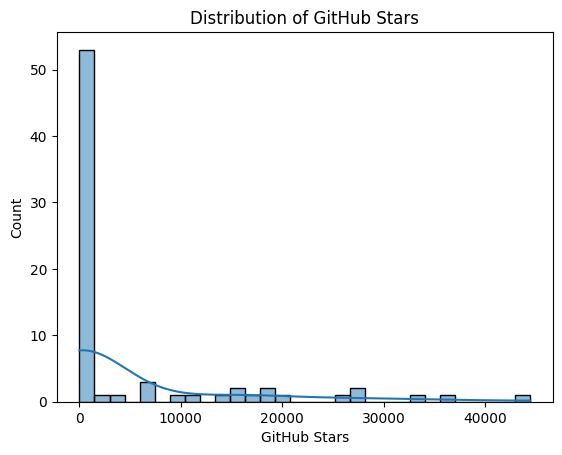

In [138]:
sns.histplot(
    df_master['github_stars'],
    bins=30,
    kde=True
)
plt.xlabel('GitHub Stars')
plt.title('Distribution of GitHub Stars')
plt.show()

<Axes: xlabel='success_label', ylabel='google_trends_score'>

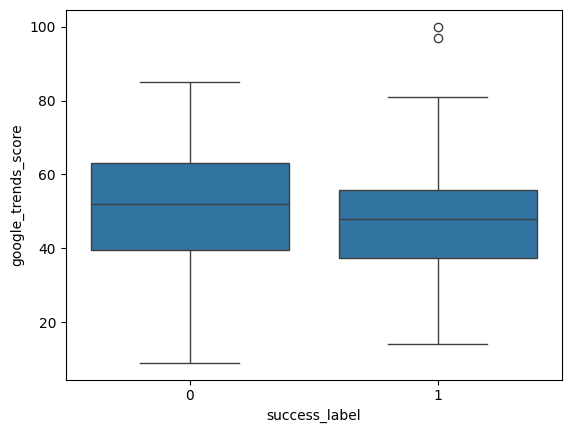

In [140]:
sns.boxplot(x='success_label', y='google_trends_score', data=df_master)

## Even though the product has better google_trends_score it seems to fail -- hype ?

<Axes: xlabel='success_label', ylabel='monthly_web_visits_k'>

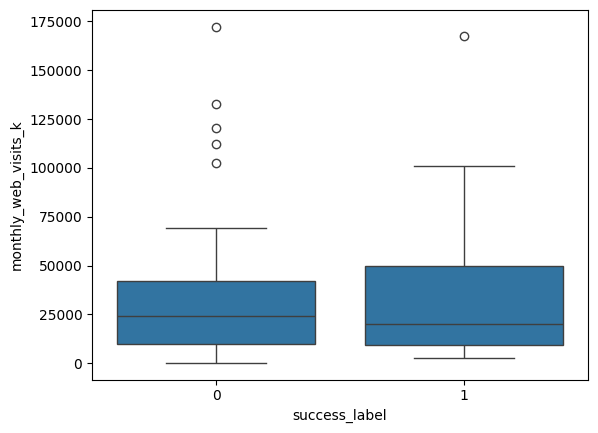

In [141]:
sns.boxplot(x='success_label', y='monthly_web_visits_k', data=df_master)

<Axes: xlabel='success_label', ylabel='integration_count'>

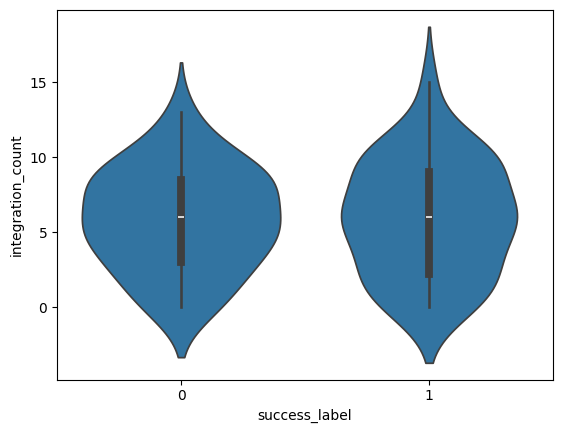

In [166]:
sns.violinplot( x='success_label', y='integration_count', data=df_master)

<Axes: xlabel='success_label', ylabel='user_friendliness_score'>

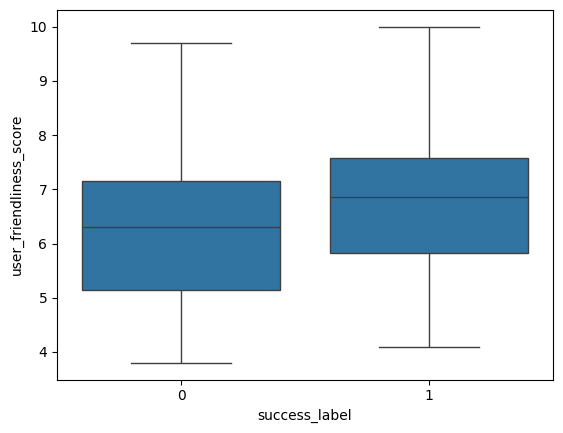

In [148]:
sns.boxplot(x='success_label', y='user_friendliness_score', data=df_master)

## Products with a slightly better user_friendliness_score tend to have good success rate

<Axes: xlabel='success_label', ylabel='marketing_effort_score'>

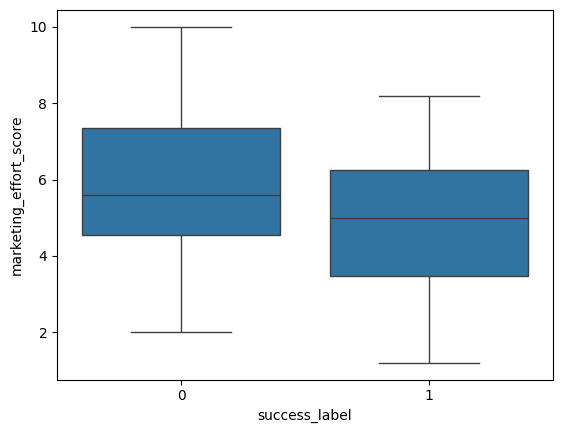

In [149]:
sns.boxplot(x='success_label', y='marketing_effort_score', data=df_master)

## Product that needs more marketing_effort seems to fail
## Focusing more on Marketing and creating more hype will eventually make a product fail

In [173]:
df_master["marketing_to_retention"] = df_master["marketing_effort_score"] / (df_master["retention_proxy"] + 0.01)

<Axes: xlabel='success_label', ylabel='marketing_to_retention'>

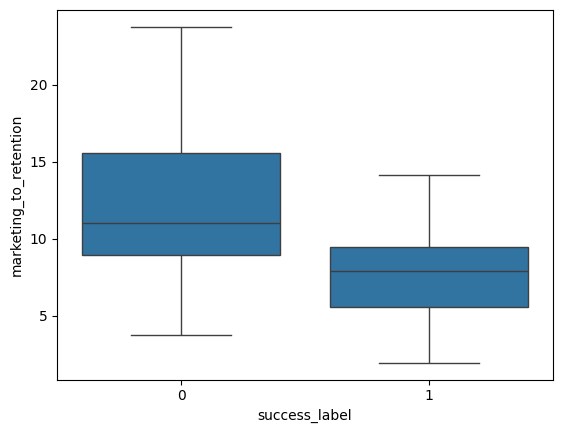

In [176]:
sns.boxplot(x='success_label', y='marketing_to_retention', data=df_master)

### Products with high marketing to retention ratios are disproportionately represented among failed tools, indicating hype driven launches

<Axes: xlabel='success_label', ylabel='ecosystem_score'>

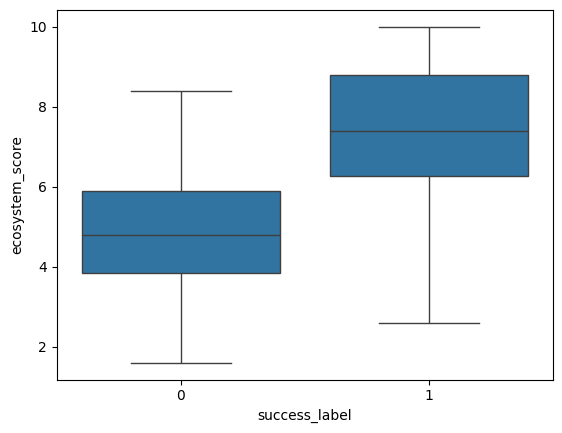

In [150]:
sns.boxplot(x='success_label', y='ecosystem_score', data=df_master)

In [169]:
df_master.groupby('success_label')['ecosystem_score'].mean()

success_label
0    4.888571
1    7.313158
Name: ecosystem_score, dtype: float64

### if you have a higher ecosytem_score on an average then the success rate of the product will be higher
### Higher ecosystem_score = higher success rate

<Axes: xlabel='success_label', ylabel='retention_proxy'>

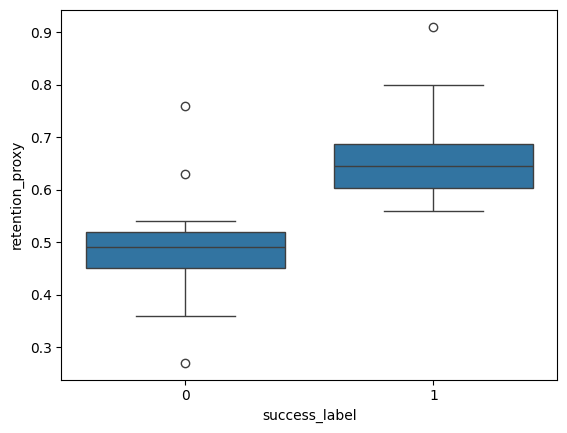

In [170]:
sns.boxplot(x='success_label', y='retention_proxy', data=df_master)

In [171]:
df_master.groupby('success_label')['retention_proxy'].mean()

success_label
0    0.486000
1    0.657105
Name: retention_proxy, dtype: float64

### if you have a higher retention proxy on an average then the success rate of the product will be higher
### Higher Retention score = higher success label

In [152]:
df_master.head()

,tool_id,tool_name,category,launch_year,age_years,pricing_model,access_method,open_source,github_stars,google_trends_score,monthly_web_visits_k,api_available,integration_count,user_friendliness_score,marketing_effort_score,ecosystem_score,retention_proxy,enterprise_features,success_label
0,1,ChatGPT,consumer_ai,2016,9,subscription,api,True,897,55,49250,True,10,7.2,5.2,7.3,0.73,False,1
1,2,Claude,creative_ai,2018,7,free,cli,True,0,15,37854,True,3,5.8,6.6,5.1,0.45,True,0
2,3,Perplexity,productivity_ai,2016,9,usage_based,web_app,False,0,52,7478,True,3,5.4,1.2,4.7,0.61,False,1
3,4,Midjourney,consumer_ai,2015,10,freemium,api,True,0,66,14941,True,1,5.6,4.9,4.8,0.59,False,1
4,5,Stable Diffusion,productivity_ai,2023,2,free,cli,True,0,23,31296,True,2,6.8,7.3,4.0,0.37,False,0


## Summary

#### 1. "ml_platform" and "consumer_ai" have better success rate
#### 2. "Productivity_ai" has the least success rate or more failure rate
#### 3. There's a 100% chance that a new AI product will be a success -- is it because of the hype
#### 4. There's an 80% chance of success rate if the pricing model is 'Enterprise'
#### 5. There's a 78% chance of failure rate if the pricing model is 'free'
#### 6. There's a 76% chance of failure rate if the access method is 'cli'
#### 7. if the Ecosystem_score is high then the retention_proxy is high
#### 8. if the retention_proxy is high then the success rate is high
#### 9. Even though the product has better google_trends_score it seems to fail -- hype ?
#### 10. Products with a slightly better user_friendliness_score tend to have good success rate
#### 11. Product that needs more marketing_effort seems to fail
#### 12. Focusing more on Marketing and creating more hype will eventually make a product fail
#### 13. Products with high marketing to retention ratios are disproportionately represented among failed tools, indicating hype driven launches
#### 14. if you have a higher ecosytem_score on an average then the success rate of the product will be higher
#### 15. Higher ecosystem_score = higher success rate
#### 16. if you have a higher retention proxy on an average then the success rate of the product will be higher
#### 17. Higher Retention score = higher success label